In [76]:
import torch
from torch import nn

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor #converts images to tensors

import matplotlib.pyplot as plt


In [77]:
#getting dataset , here we are gonna use MNIST fashion datasets
train_data=datasets.FashionMNIST(
    root="data", #where to download
    train=True,#do we want training or testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None #defines how to transform how to transform labels
)

test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [78]:
len(train_data), len(test_data)

(60000, 10000)

In [79]:
#See the first training sample
image , label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [80]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [81]:
class_to_index=train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [82]:
image.shape , label #label doesnt have a shape, since its an integer 

(torch.Size([1, 28, 28]), 9)

color channel , height, width format here , greyscale has one color channel since its just black and white and in between 

torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

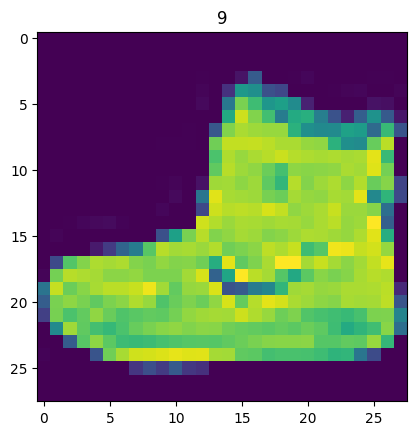

In [83]:
import matplotlib.pyplot as plt 
image, label= train_data[0]
print(image.shape)#shape error is very common
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

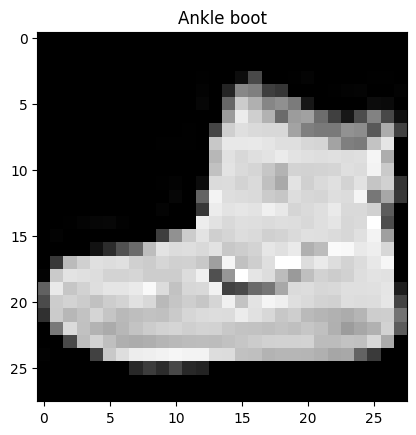

In [84]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

3162
26615
6932
22577
55510
9225
36280
50049
33126
6080
46936
44076
8741
35690
35572
39915


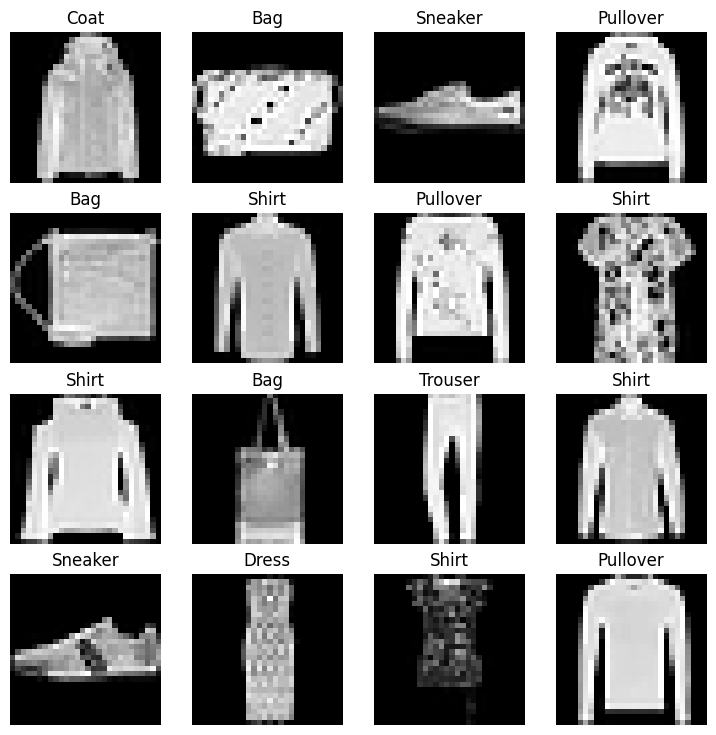

In [85]:
#random images now via imshow
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    print(random_idx)
    img ,label= train_data[random_idx]
    fig.add_subplot(rows, cols , i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [86]:
#prepare a dataloader 
#right now data is in the form of a pytorch datasets
#dataloader turns tensor into a python iterable. basically we are turning data into batches and mini batches 

from torch.utils.data import DataLoader

#setup the batch size 
BATCH_SIZE= 32

#turn data sets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)#order doesnt matter in the test data , its more optimized to keep the shuffle off 

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x21b80059700>,
 <torch.utils.data.dataloader.DataLoader at 0x21b802397f0>)

In [87]:
len(train_dataloader), len(test_dataloader) #numbers of batches created 


(1875, 313)

In [88]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
Label: 1 Label shape: torch.Size([])


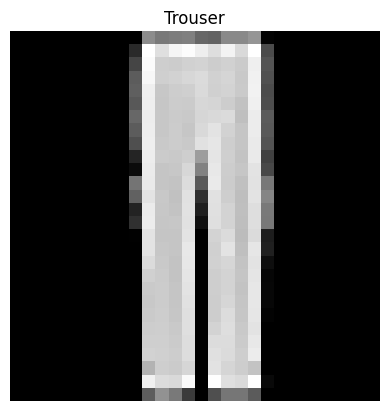

In [89]:
#show a sample 
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"Label: {label} Label shape: {label.shape}")

=================== end of data loading part ===========================

In [90]:
#model0 , baseline mode 
#create flatter layer

flatten_model= nn.Flatten()

#Get a single sample 
x= train_features_batch[0]
x , x.shape

#Flatten the sample , does forward pass internally 
output=flatten_model(x)#performs forward pass 

print(f"shape before flattening : {x.shape} -> color channel , height , width")
print(f"shape after flatterning: {output.shape} -> color channel , height*width")

shape before flattening : torch.Size([1, 28, 28]) -> color channel , height , width
shape after flatterning: torch.Size([1, 784]) -> color channel , height*width


In [91]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0118, 0.0000, 0.0549, 0.4471, 0.5647, 0.3176, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0118, 0.0000, 0.1294, 0.8627, 0.1765, 0.0118, 0.6706,
        0.5137, 0.0000, 0.0235, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.5725, 0.0706, 0.0000, 0.0000,
        0.0000, 0.8431, 0.2627, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0275, 0.0000, 0.4039, 0.4902, 0.0000, 0.0078,
        0.0078, 0.0000, 0.5098, 0.7412, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [92]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [93]:
torch.manual_seed(69)

#setup model with input parameters
model0=FashionMNISTModelV0(
    input_shape=784,#output of flatten is input here, i.e 28*28
    hidden_units=10, 
    output_shape=len(class_names)#one for every class 
).to("cpu")

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [94]:
#creating raw logits 
dummydat=torch.rand([1,1,28,28])
model0(dummydat)

tensor([[-0.0202, -0.2152,  0.5079,  0.0495, -0.3395,  0.1103,  0.4908,  0.2148,
          0.1127, -0.0960]], grad_fn=<AddmmBackward0>)

In [95]:
#loss optimizer setup 
#multiple class so cross entropy loss , optimier will be SGD 
#evaluation metric will be accuracy 

from helper_functions import accuracy_fn


#Setup loss function and optimizer 
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [96]:
#creating a function to time the experiments 
from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device:torch.device = None):
    '''prints difference between start and end time'''
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [97]:

start_time= timer()
#codeblock
end_time= timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.6299996786983684e-05

In [98]:
#creating training loop and training model on batches 
from tqdm.auto import tqdm

#set the seed and start the timer 
torch.manual_seed(69)
train_time_start_cpu = timer()

epochs = 3

#create training and test loop 

for epoch in tqdm(range(epochs)):
    print("Epoch: {epoch}\n --------")
    #training
    train_loss=0
    #add a loop to loop through training data 
    for batch, (X,y) in enumerate(train_dataloader):
        model0.train()
        #forward pass 
        y_pred = model0(X)
        #loss calc per batch 
        loss = loss_fn(y_pred,y)
        train_loss += loss #accumalation of training loss values of every batch

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        #print progress
        if batch%400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)})")
        
#divide total train loss by length of train dataloader
train_loss/=len(train_dataloader)
#testing
testloss, test_acc = 0,0
model0.eval()
with torch.inference_mode():
    for X,y in test_dataloader:
        #forward pass
        test_pred = model0(X)

        #calculate loss
        testloss+= loss_fn(test_pred,y)
    
        #calculate accuracy
        test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    #calculate the test loss average 
    testloss/=len(test_data)

    #test accuracy per batch
    test_acc /= len(test_dataloader)
#print
print(f"\n Train loss: {train_loss:.4f} | test loss: {testloss:.4f}, test acc: {test_acc}")
#calc train time 
train_time_end_on_cpu=timer()
total_train_time_model0= print_train_time(start=train_time_start_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model0.parameters())).device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


 33%|███▎      | 1/3 [00:04<00:08,  4.50s/it]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


 67%|██████▋   | 2/3 [00:08<00:04,  4.21s/it]

Epoch: {epoch}
 --------
Looked at 0/60000)
Looked at 12800/60000)
Looked at 25600/60000)
Looked at 38400/60000)
Looked at 51200/60000)


100%|██████████| 3/3 [00:12<00:00,  4.29s/it]



 Train loss: 0.4525 | test loss: 0.0156, test acc: 82.25838658146965


AttributeError: 'str' object has no attribute 'device'